# Network Clustering - Lab

## Introduction

In this lab you'll practice your clustering and visualization skills to investigate stackoverflow! Specifically, the dataset you'll be investigating examines tags on stackoverflow. With this, you should be able to explore some of the related technologies currently in use by developers.

## Objectives
You will be able to:

* Implement network clustering with k-clique clustering
* Implement network clustering with the Girvan-Newman algorithm
* Visualize clusters

## Load the Dataset

Load the dataset from the `stack-overflow-tag-network/stack_network_links.csv` file. For now, simply load the file as a standard pandas DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('stack-overflow-tag-network/stack_network_links.csv')
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


## Transform the Dataset into a Network Graph using NetworkX

Transform the dataset from a Pandas DataFrame into a NetworkX graph.

In [5]:
import networkx as nx

G = nx.from_pandas_edgelist(df, 'source', 'target', ['value'])

## Create an Initial Graph Visualization

Next, create an initial visualization of the network.

/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


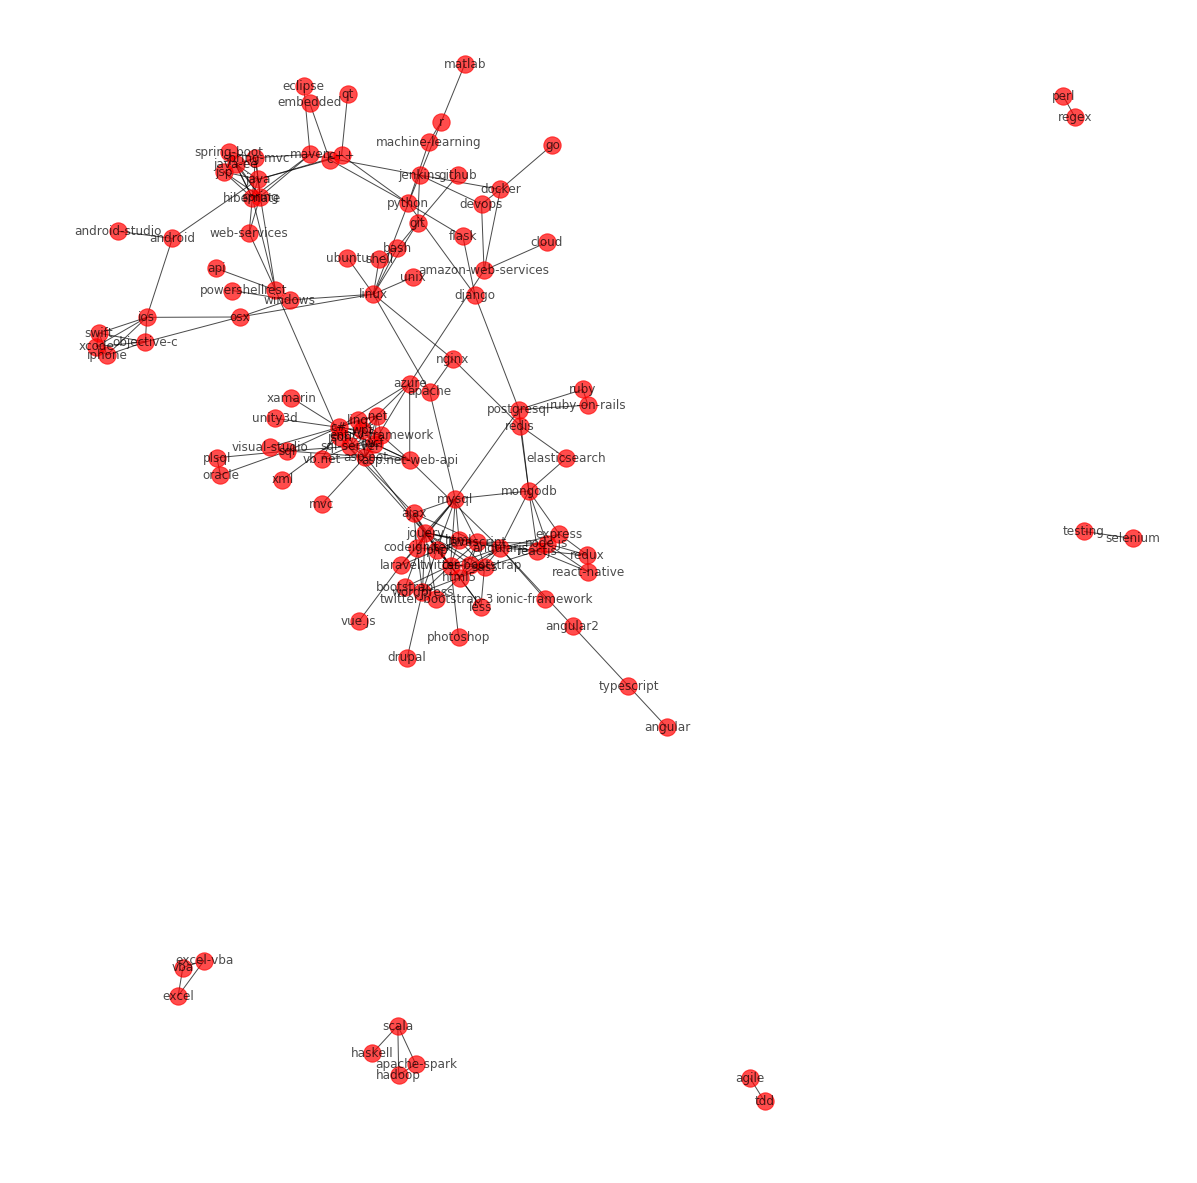

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
nx.draw(G, with_labels=True, alpha=.7, pos=nx.spring_layout(G, seed=2))

## Perform an Initial Clustering using k-clique Clustering

Begin to explore the impact of using different values of k.

In [16]:
c = list(nx.algorithms.community.k_clique_communities(G, k=4))
c

[frozenset({'hibernate',
            'java',
            'java-ee',
            'jsp',
            'maven',
            'spring',
            'spring-boot',
            'spring-mvc'}),
 frozenset({'hibernate', 'rest', 'spring', 'web-services'}),
 frozenset({'.net',
            'asp.net',
            'asp.net-web-api',
            'azure',
            'c#',
            'entity-framework',
            'linq',
            'sql',
            'sql-server',
            'vb.net',
            'wcf',
            'wpf'}),
 frozenset({'ajax',
            'angularjs',
            'codeigniter',
            'css',
            'express',
            'html',
            'html5',
            'javascript',
            'jquery',
            'laravel',
            'less',
            'mongodb',
            'mysql',
            'node.js',
            'php',
            'react-native',
            'reactjs',
            'redux',
            'sass',
            'twitter-bootstrap',
            'wordpress'})

## Visualize The Clusters Produced from the K-Clique Algorithm

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

In [17]:
colors = [("teal","#1cf0c7"),
         ( "workzone_yellow","#ffd43d"),
         ("light-blue","#00b3e6"),
         ("medium-blue","#32cefe"),
         ("gray","#efefef"),
         ("slate","#2b2b2b"),
         ("dark-blue", "#144ff")]
color_dict = dict(colors)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


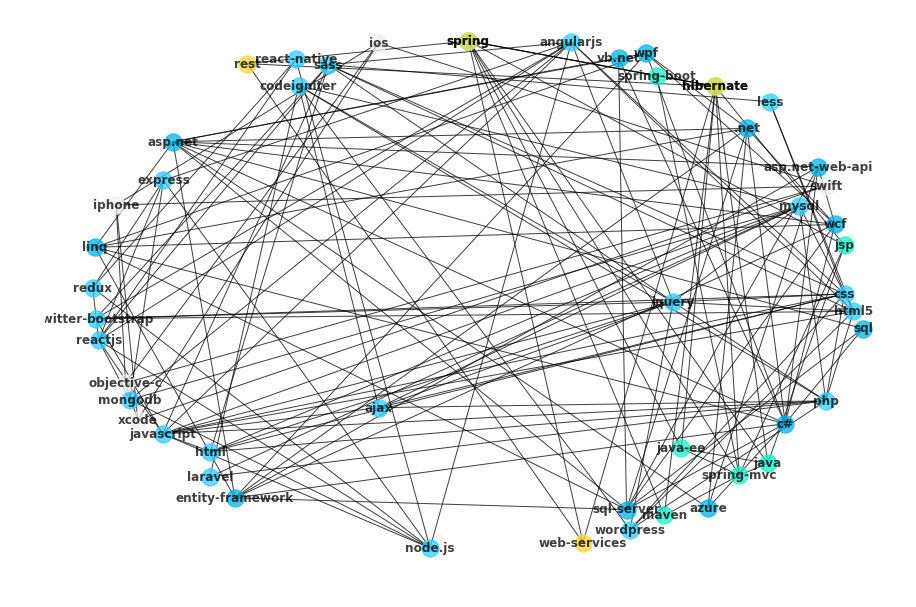

In [28]:
fig = plt.figure(figsize=(12,8))
c = list(nx.algorithms.community.k_clique_communities(G, k=4))

for n, ci in enumerate(c):
    ci = G.subgraph(ci)
    nx.draw(ci, with_labels=True, node_color=colors[n][1],
            alpha=.75, font_weight="bold", pos=nx.spring_layout(G, k=2.66, seed=10))

## Perform an Alternative Clustering Using the Girvan-Newman Algorithm

Recluster the network using the Girvan-Newman algorithm. Remember that this will give you a list of cluster lists corresponding to the clusters that form from removing the top n edges according to some metric, typically edge betweenness.

In [29]:
c_gn = list(nx.algorithms.community.centrality.girvan_newman(G))
print(len(c_gn), c_gn[:3])

109 [({'asp.net', 'xamarin', '.net', 'mvc', 'entity-framework', 'linq', 'vb.net', 'sql', 'asp.net-web-api', 'wcf', 'wpf', 'unity3d', 'visual-studio', 'sql-server', 'plsql', 'azure', 'oracle', 'c#'}, {'tdd', 'agile'}, {'jquery', 'ionic-framework', 'github', 'django', 'nginx', 'hibernate', 'android', 'mongodb', 'git', 'express', 'bootstrap', 'rest', 'objective-c', 'api', 'node.js', 'r', 'spring', 'c', 'json', 'android-studio', 'sass', 'typescript', 'php', 'powershell', 'jsp', 'cloud', 'spring-mvc', 'codeigniter', 'spring-boot', 'photoshop', 'react-native', 'apache', 'embedded', 'redux', 'twitter-bootstrap', 'machine-learning', 'python', 'ubuntu', 'ajax', 'qt', 'html', 'c++', 'elasticsearch', 'less', 'postgresql', 'docker', 'ruby-on-rails', 'css', 'amazon-web-services', 'reactjs', 'swift', 'drupal', 'java', 'web-services', 'linux', 'wordpress', 'html5', 'vue.js', 'unix', 'laravel', 'osx', 'bash', 'flask', 'angular', 'matlab', 'devops', 'iphone', 'ios', 'angularjs', 'maven', 'java-ee', 'an

## Create a Visualization Wrapper

Now that you have an idea of how splintered the network becomes based on the number of edges removed, you'll want to examine some of the subsequent groups that gradually break apart. Since the network is quiet complex to start with, using subplots is not a great option; each subplot would be too small to accurately read. Create a visualization function `plot_girvan_newman(G,clusters)` which takes a NetworkX graph object as well as one of the clusters from the output of the Girvan-Newman algorithm above and plots the network with a unique color for each cluster.

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

In [ ]:
def plot_girvan_newman(G, clusters):
    #Your code here

## Visualize the Various Clusters that Form Throughout the Girvan-Newman Algorithm

Use your function to visualize the various clusters that form throughout the Girvan-Newman algorithm as you remove more and more edges from the network.

In [ ]:
#Your code here

## Cluster Decay Rate

Create a visual to help yourself understand the rate at which clusters of this network formed versus the number of edges removed.

> **Level-Up**: Based on your graphic, what would you predict is an appropriate number of clusters? 

In [ ]:
#Your code here

## Choose a Clustering 

Now that you have generated various clusters within the overall network, which do you think is the most appropriate or informative?

In [ ]:
#Your code/response here

## Summary

In this lab you practice using the k-clique and Girvan-Newman methods for clustering. Additionally, you may have also gotten a better sense of some of the current technological landscape. As you can start to see, network clustering provides you with powerful tools to further subset large networks into smaller constituencies allowing you to dig deeper into their particular characteristics.